In [1]:
import pypsa
import numpy as np
import pandas as pd
import os
import matplotlib
matplotlib.use("TkAgg")
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
plt.rcParams['figure.dpi']= 400
plt.style.use('bmh')
%matplotlib inline

In [2]:
path_network = 'D:\\Python\PyPSA\\Luca\\zonal_nodal_networks\\2018\\nodal_1024_costs2018.nc'
n = pypsa.Network(path_network)

INFO:pypsa.io:Imported network nodal_1024_costs2018.nc has buses, carriers, generators, lines, links, loads, storage_units


In [6]:
path_network = 'D:\\Python\PyPSA\\Luca\\zonal_nodal_networks\\2018\\zonal_1024_costs2018.nc'
z = pypsa.Network(path_network)

INFO:pypsa.io:Imported network zonal_1024_costs2018.nc has buses, carriers, generators, links, loads, storage_units


In [3]:
def remove_s_nom0_lines(network):
    line_0_snom = [line for line in network.lines.index if network.lines.s_nom[line] == 0]
    print("removing the following lines because they have 0 capacity: {}".format(line_0_snom))
    network.mremove("Line", line_0_snom)
    return network

In [4]:
n = remove_s_nom0_lines(n)

removing the following lines because they have 0 capacity: ['3', '206', '255', '305', '308', '330', '395', '414', '456', '458', '460', '562', '597', '603', '647', '926', '1110', '1111', '1171', '1353', '1360', '1380', '1431', '1470', '1485', '1489', '1541']


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


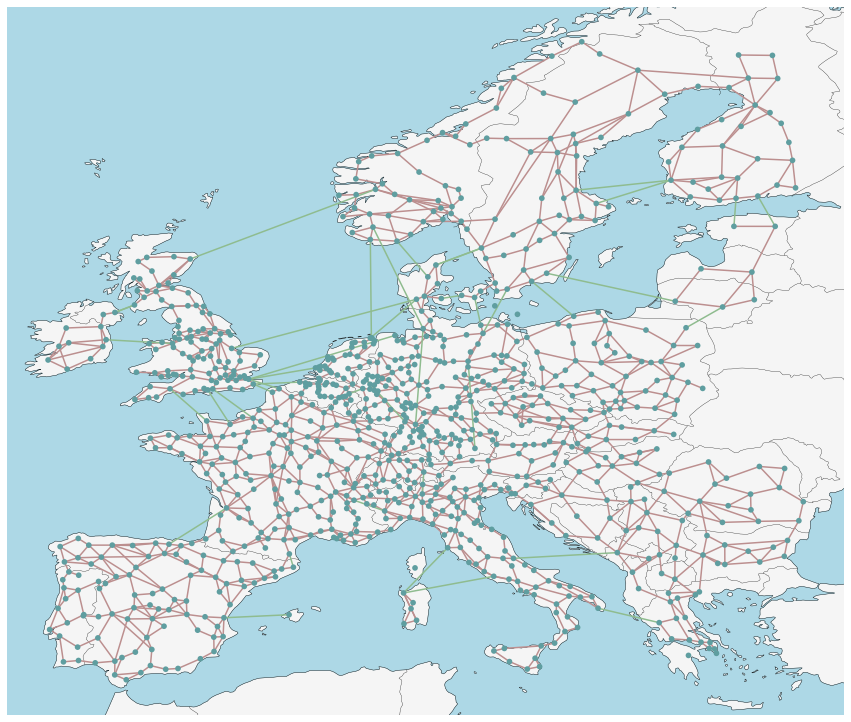

In [5]:
fig,ax = plt.subplots(
            figsize=(15,15),
            subplot_kw={"projection":ccrs.PlateCarree()}
        )# other options for map projection: Orthographic, Mercator
fig = n.plot(ax=ax,color_geomap=True)

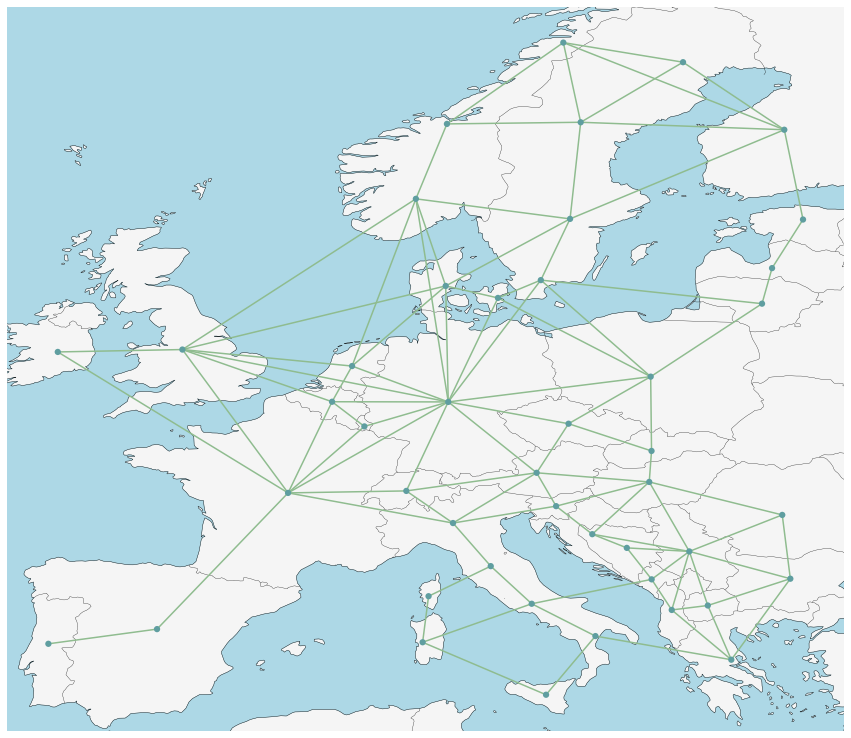

In [7]:
fig,ax = plt.subplots(
            figsize=(15,15),
            subplot_kw={"projection":ccrs.PlateCarree()}
        )# other options for map projection: Orthographic, Mercator
fig = z.plot(ax=ax,color_geomap=True)

In [8]:
for c in z.iterate_components(list(z.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))


Component 'Bus' has 45 entries
Component 'Carrier' has 15 entries
Component 'LineType' has 31 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 96 entries
Component 'Load' has 973 entries
Component 'Generator' has 4639 entries
Component 'StorageUnit' has 396 entries


In [9]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 1010 entries
Component 'Carrier' has 15 entries
Component 'Line' has 1662 entries
Component 'LineType' has 31 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 42 entries
Component 'Load' has 973 entries
Component 'Generator' has 4639 entries
Component 'StorageUnit' has 396 entries


In [11]:
z.buses.zone

name
AL          AL
AT          AT
BA          BA
BE          BE
BG          BG
CH          CH
ITn        ITn
CZ          CZ
DE          DE
DKw        DKw
DKe        DKe
EE          EE
ES          ES
FI          FI
FR          FR
GB          GB
GR          GR
HR          HR
HU          HU
IE          IE
ITsic    ITsic
ITs        ITs
ITcs      ITcs
ITcn      ITcn
ITsar    ITsar
LT          LT
LU          LU
LV          LV
ME          ME
MK          MK
NL          NL
NOm        NOm
NOs        NOs
NOn        NOn
PL          PL
PT          PT
RO          RO
RS          RS
SE1        SE1
SE3        SE3
SE2        SE2
SE4        SE4
SI          SI
SK          SK
ITCO      ITCO
Name: zone, dtype: object